# Simulating time series

Simulating data is a very important aspect of time series. We can use simulated data to build models and to test significances

Tasks:
Use simple functions to simulte white noise and random walks (red noise). There are sevreal ways to simulate a random walk.

This tutorial is part of Advanced Research Topics, led by Dr. William Alston

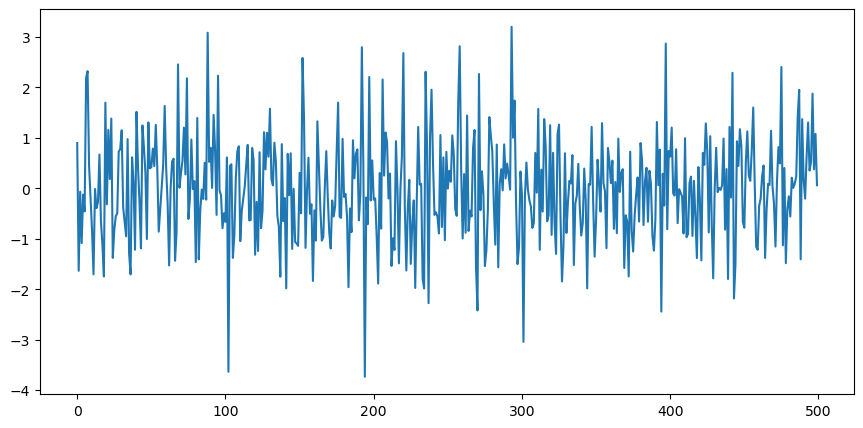

In [26]:
# Simulate a white noise time series

# Use the function random.normal()

# start with mean=0 and standard deviation=1 and make the time series length 500

import numpy
import matplotlib.pyplot as plt

mean = 0
std = 1
num_samples = 500 #length of the time series

# make one random realisation
white_noise = numpy.random.normal(mean, std, size=num_samples)

# PLot
plt.rcParams["figure.figsize"]=10.5,5
plt.plot(white_noise)
plt.show()

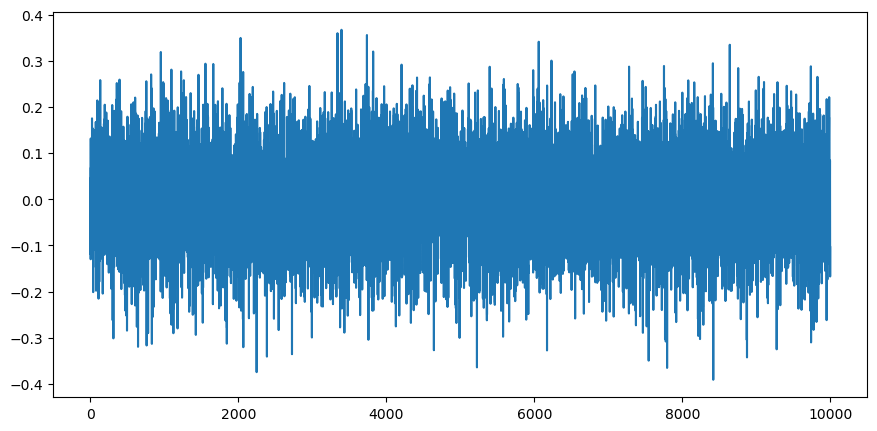

In [25]:
# can do it with Guassian and make a plot of the distribution

import numpy as np
import seaborn as sns

mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, size=10000) # 1000 samples with normal distribution

plt.rcParams["figure.figsize"]=10.5,5
plt.plot(s)
plt.show()


<Axes: ylabel='Density'>

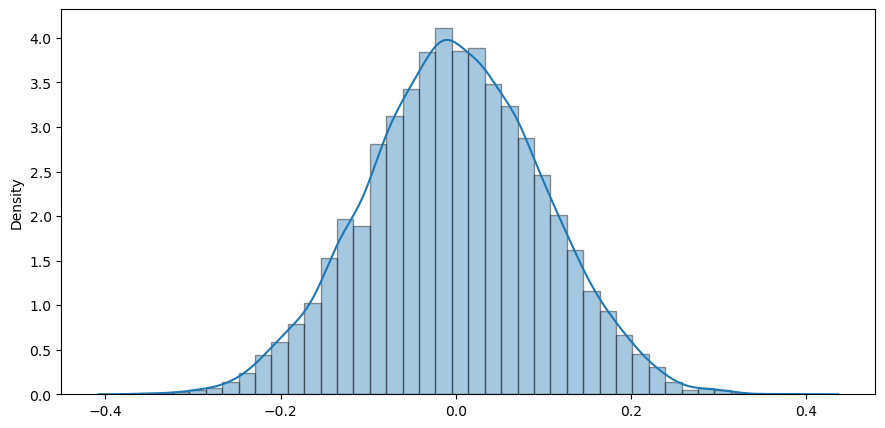

In [24]:
# PLot the distribution that you have just simulated.

# seaborn histogram with Kernel Density Estimation
plt.rcParams["figure.figsize"]=10.5,5
sns.distplot(s, bins=40, hist_kws={'edgecolor':'black'})

# Tasks:

## Increase the number of samples to 10000 and replot the time series and distriubution




## What affect does this have on the resulting plots?

# The autocorrelation function

In lecture 2 I introduced the idea of the Autocorrrelation function (ACF). This can be used to tell us about the stochastic noise generating process.

The ACF measures the correlation of time series against a time-shifted version of itself. The ACF value is defined bewteen -1 to +1.

This is computed for a range of shifts 'k', including at k=0. At shift k=0, the times series is being correlated with itslef, so we expect this to have a correlation of 1. 



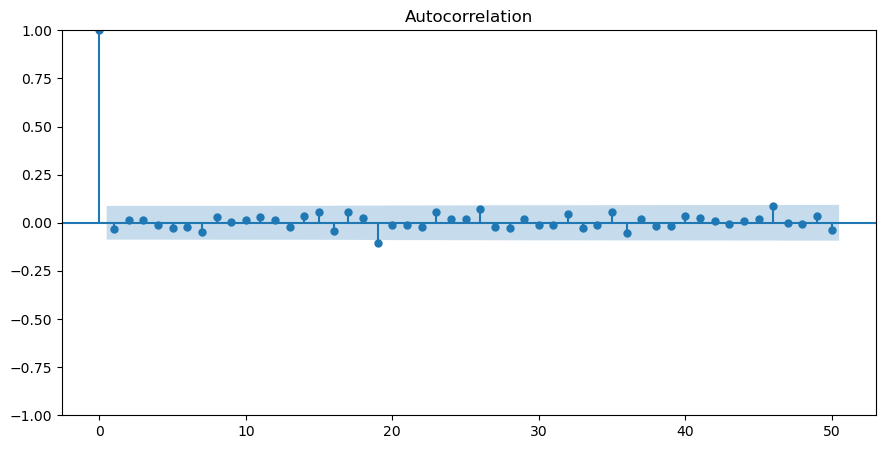

In [23]:
# Compute the ACF for the generated white noise
from statsmodels.graphics.tsaplots import plot_acf, acf
from matplotlib import pyplot as plt
import numpy as np
#random_walk_acf_coef = acf(white_noise)
#random_walk_acf_coef


#fig, ax = plt.subplots(dpi=144)
#plt.xlabel('Lag, k', fontsize=14)
#plt.ylabel('ACF', fontsize=14)
#plot_acf(white_noise, lags=50);
#
mean = 0
std = 1 
num_samples = 500 #length of the time series

# make one random realisation
white_noise = np.random.normal(mean, std, size=num_samples)

acf_coef = acf(white_noise)

#fig, ax = plt.subplots(dpi=90)
#plt.rcParams["figure.figsize"]=10.5,5
#plt.xlabel('Lag, k', fontsize=14)
#plt.ylabel('ACF', fontsize=14)
plot_acf(white_noise, lags=50)
plt.show()

# Now generate a random walk time series. 

There are several ways to do this.

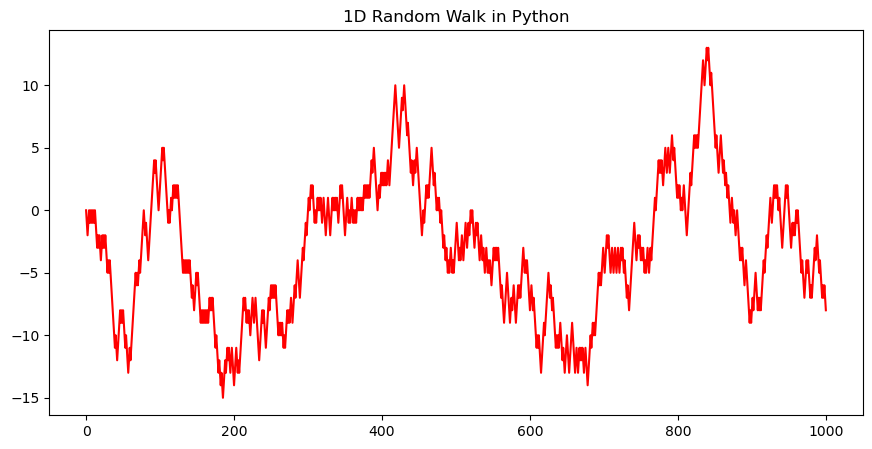

In [20]:
#Random walk from randomly selecting up and down for next move


import numpy as np
import matplotlib.pyplot as plt
import random
def randomwalk1D(n):
    x, y = 0, 0
    # Generate the time points [1, 2, 3, ... , n]
    timepoints = np.arange(n + 1)
    positions = [y]
    directions = ["UP", "DOWN"]
    for i in range(1, n + 1):
        # Randomly select either UP or DOWN
        step = random.choice(directions)
        
        # Move the object up or down
        if step == "UP":
            y += 1
        elif step == "DOWN":
            y -= 1
        # Keep track of the positions
        positions.append(y)
    return timepoints, positions



time_data, pos_data = randomwalk1D(1000)
plt.rcParams["figure.figsize"]=10.5,5
plt.plot(time_data, pos_data, 'r-')
plt.title("1D Random Walk in Python")
plt.show()

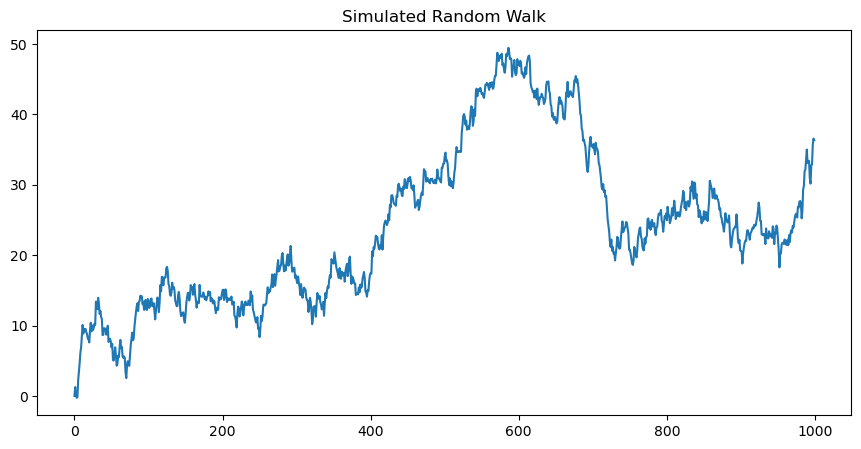

In [27]:
# Another method to produce a random walk

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline


plt.rcParams['figure.figsize'] = [10, 7.5]


steps = np.random.standard_normal(1000)
steps[0]=0
random_walk = np.cumsum(steps)

#random_walk[:50]

# Plot
plt.rcParams["figure.figsize"]=10.5,5
plt.plot(random_walk)
plt.title("Simulated Random Walk")
plt.show()

## Compute and plot the ACF of these simulated random walks

Now lets check the ACF of these

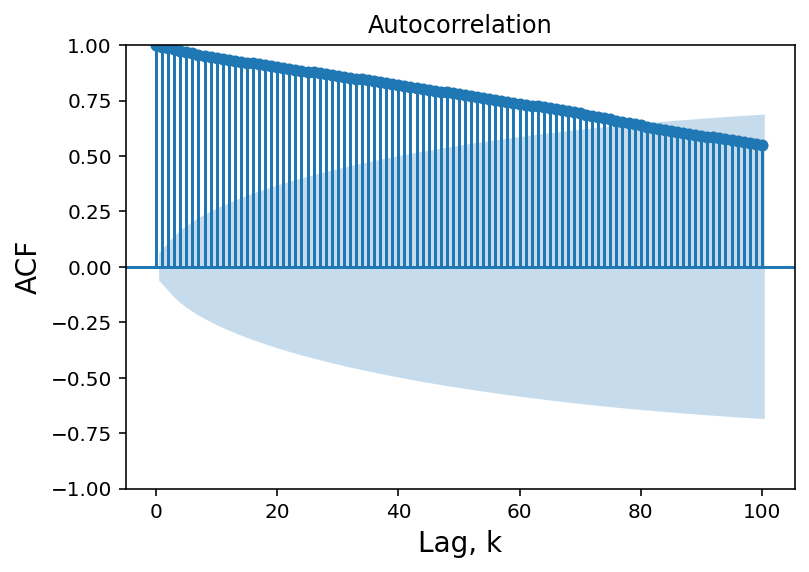

In [35]:
from statsmodels.graphics.tsaplots import plot_acf, acf

random_walk_acf_coef = acf(random_walk)



# Plot
fig, ax = plt.subplots(dpi=144)
plt.rcParams["figure.figsize"]=6,4
plt.xlabel('Lag, k', fontsize=14)
plt.ylabel('ACF', fontsize=14)
plot_acf(random_walk, lags=100, ax=ax);

## Interpreting the ACF


Q: Does the ACF look as we expect? Can you see the difference between the ACF for white noise and a random walk.

hint: check the lecture notes

# Differencing operator to remove non-stationarity

In the lecture we talked about how the 'differencing operator' can be used to make a non-stationary random walk into a staionary white noise process

try that

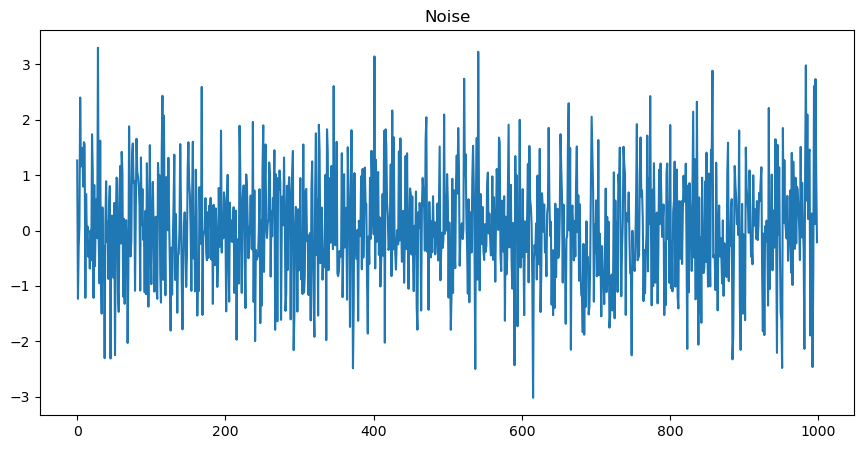

In [38]:
#Can use the diff() fuinction for this

random_walk_diff = np.diff(random_walk, n=1)


plt.rcParams["figure.figsize"]=10.5,5; # Set dimensions for figure
plt.plot(random_walk_diff)
plt.title('Noise')
plt.show()

## any changes to the ACF?

Now check how the ACF has changed

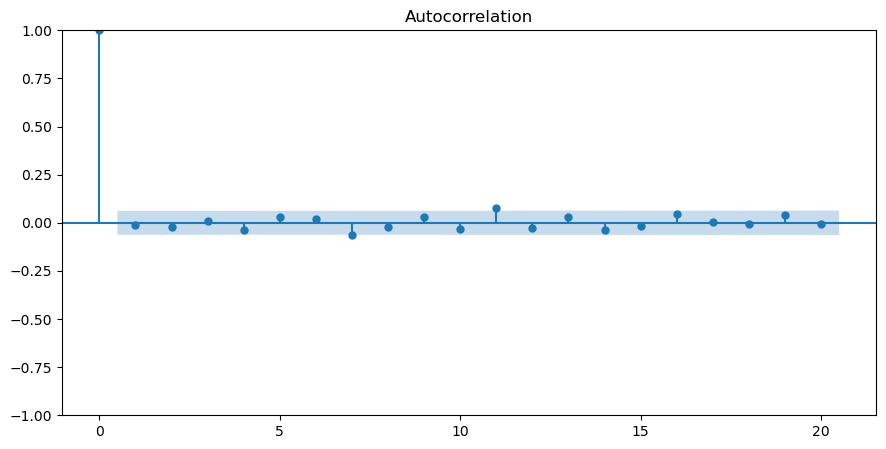

In [40]:
plot_acf(random_walk_diff, lags=20)
plt.show()